Import all the required packages (including the python library for data handling)

In [16]:
import os
import trackml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from trackml.dataset import load_event
from trackml.dataset import load_dataset

### Part 1: Look at the Raw Data

Read in one event to look at

In [4]:
event_pref = 'event000001000'
hits, cells, particles, truth = load_event(os.path.join('train_100_events',event_pref))

In [7]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


the x,y,z coordinates here are absolute locations in mm.  
Detector volumes are split into layers which have some number of modules.  
According to the website, the 'pixel tracker' would be volumes 7, 8, and 9
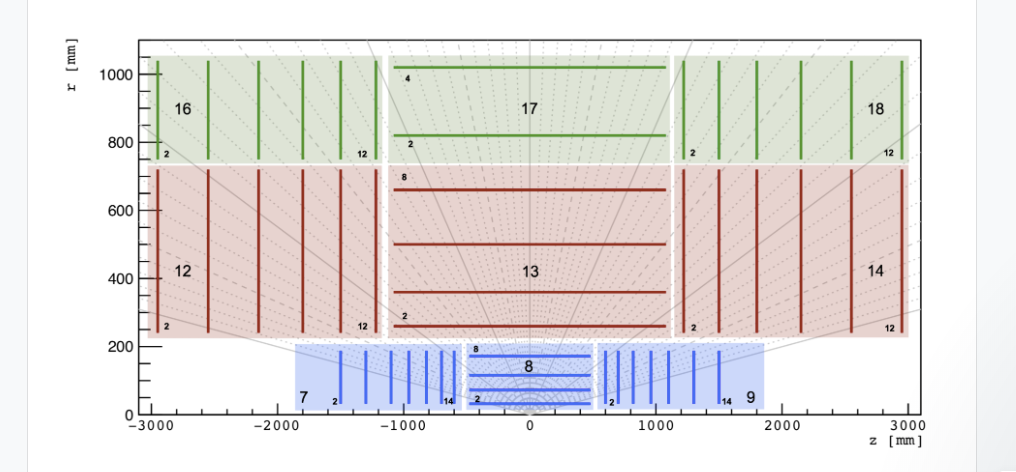

In [9]:
cells.head()

,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087
4,3,58,954,0.034005


In [8]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3


In [10]:
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009


find all the hits for one truth particle

In [5]:
ind_hits_t=truth.loc[truth['particle_id']==4503668346847232]
ind_hits_t

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
20879,20880,4503668346847232,-6.373050,31.601900,-20.080000,-0.074873,0.319162,-0.203232,0.000018
29322,29323,4503668346847232,-16.962099,71.000504,-45.638100,-0.096428,0.311619,-0.204427,0.000014
35620,35621,4503668346847232,-31.188400,112.045998,-73.201897,-0.118230,0.302181,-0.206065,0.000010
42237,42238,4503668346847232,-54.559299,162.826004,-108.474998,-0.151918,0.287370,-0.204184,0.000008
73762,73763,4503668346847232,-105.022003,240.369003,-166.449005,-0.200451,0.254855,-0.201860,0.000005
80880,80881,4503668346847232,-177.020004,315.593994,-231.375000,-0.246460,0.210003,-0.201005,0.000005
87264,87265,4503668346847232,-303.834015,396.170013,-325.032013,-0.288603,0.130892,-0.198512,0.000009
113564,113565,4503668346847232,-1010.739990,125.904999,-862.786011,-0.120391,-0.286054,-0.203332,0.000011


here, the tx, ty, tz values are the x,y,z (in global mm coordinates) of the intersection of the true particle trajectory in the specified detector volume/module/layer closest to the (reconstructed) hit location. tpx,tpy,tpz are the same but for true particle momenta.

and now find the corresponding hits in the hit file

In [6]:
ind_hits=hits[hits.hit_id.isin(ind_hits_t.hit_id)]
ind_hits

,hit_id,x,y,z,volume_id,layer_id,module_id
20879,20880,-6.369360,31.603201,-20.085800,8,2,109
29322,29323,-16.957899,71.002403,-45.639400,8,4,218
35620,35621,-31.189100,112.045998,-73.205704,8,6,302
42237,42238,-54.560600,162.824997,-108.476997,8,8,453
73762,73763,-105.031998,240.365997,-166.699997,13,2,353
80880,80881,-176.988998,315.605988,-231.559998,13,4,495
87264,87265,-303.845001,396.164001,-325.200012,13,6,613
113564,113565,-1010.729980,125.906998,-861.799988,17,4,454


so we see one hit in each layer of the pixel tracker and one hit in the first 3 layers of the (EM?) calorimeter and one in the outer layer of the (hadronic?) calorimeter.  

### Part 2: Visualize a Track

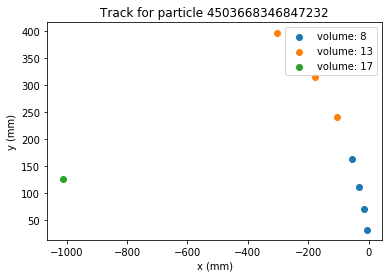

In [21]:
vols=ind_hits.volume_id.unique()
for v in vols:
    plt.scatter(ind_hits.x[ind_hits.volume_id==v], ind_hits.y[ind_hits.volume_id==v],
                label='volume: {}'.format(v))
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Track for particle 4503668346847232')
plt.legend()
plt.show()

plot it as a connected line:

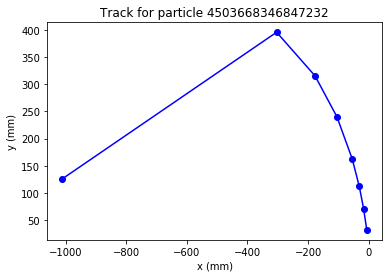

In [23]:
plt.plot(ind_hits.x,ind_hits.y, 'ob-')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Track for particle 4503668346847232')
plt.show()

and now visualize in 3D:

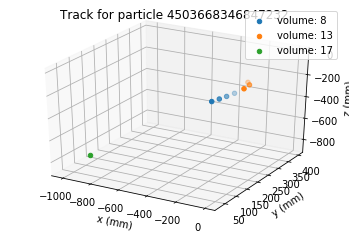

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for v in vols:
    ax.scatter(ind_hits.x[ind_hits.volume_id==v], ind_hits.y[ind_hits.volume_id==v], 
                  ind_hits.z[ind_hits.volume_id==v], label='volume: {}'.format(v))
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
ax.set_zlabel('z (mm)')
plt.title('Track for particle 4503668346847232')
plt.legend()
plt.show()

and as a connected line:

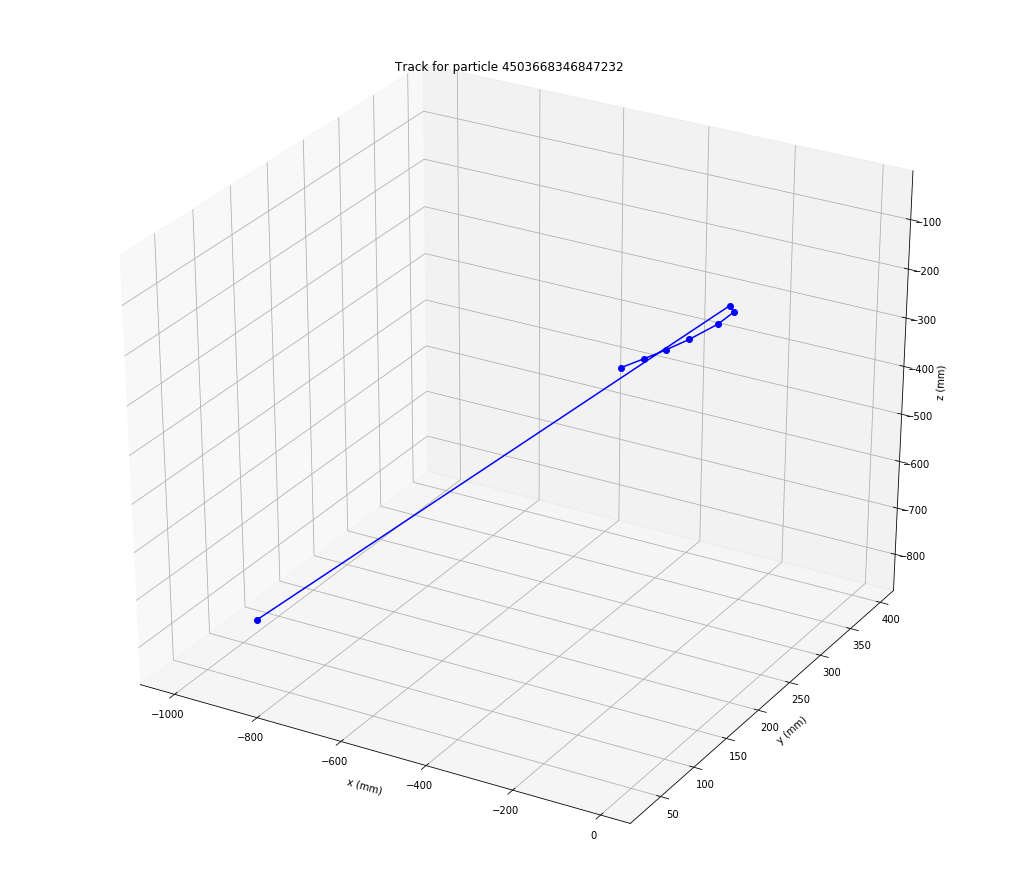

In [31]:
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111, projection='3d')
ax.plot(ind_hits.x,ind_hits.y,ind_hits.z, 'ob-')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
plt.title('Track for particle 4503668346847232')
plt.show()

**question:** isn't it weird that there is that hit in volume 17 (hadronic calorimeter? shouldn't tracks go in one direction?

### Part 3: Visualize the detector geometry

Lets look at how the modules in the barrel pixel detector line up

In [34]:
pix_barrel=hits.loc[hits['volume_id']==8]
pix_barrel.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
16873,16874,-32.554401,-3.648710,-469.864990,8,2,1
16874,16875,-33.153702,-1.934740,-423.516998,8,2,1
16875,16876,-26.362400,-18.423700,-461.375000,8,2,2
16876,16877,-12.034100,-29.649799,-464.428009,8,2,3
16877,16878,-15.127200,-28.159300,-439.713989,8,2,3


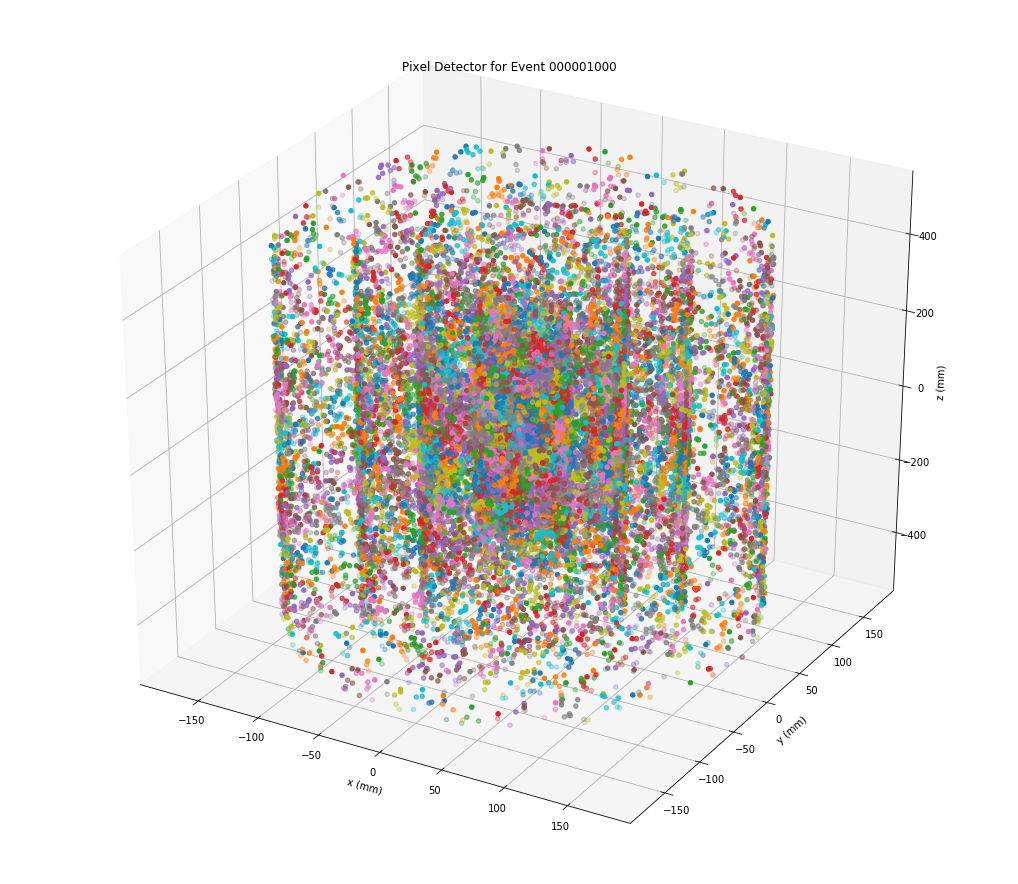

In [47]:
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111, projection='3d')
layers=pix_barrel.layer_id.unique()
for l in layers:
    lyr=pix_barrel.loc[pix_barrel['layer_id']==l]
    modules=lyr.module_id.unique()
    for m in modules:
        ax.scatter(lyr.x[lyr.module_id==m],lyr.y[lyr.module_id==m],lyr.z[lyr.module_id==m],
                  label='layer: {0} module: {1}'.format(l,m))
    #closes modules
#closes layers
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
plt.title('Pixel Detector for Event 000001000')
plt.show()

ok, not the most helpful...try in 2D:

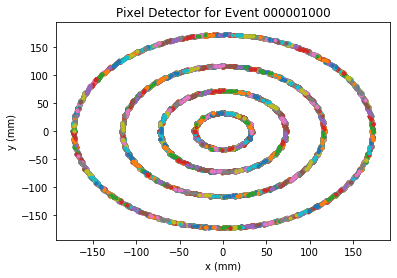

In [49]:
layers=pix_barrel.layer_id.unique()
for l in layers:
    lyr=pix_barrel.loc[pix_barrel['layer_id']==l]
    modules=lyr.module_id.unique()
    for m in modules:
        plt.scatter(lyr.x[lyr.module_id==m],lyr.y[lyr.module_id==m],
                  label='layer: {0} module: {1}'.format(l,m),marker='.')
    #closes modules
#closes layers
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Pixel Detector for Event 000001000')

plt.show()

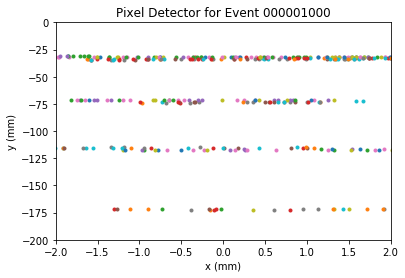

In [52]:
layers=pix_barrel.layer_id.unique()
for l in layers:
    lyr=pix_barrel.loc[pix_barrel['layer_id']==l]
    modules=lyr.module_id.unique()
    for m in modules:
        plt.scatter(lyr.x[lyr.module_id==m],lyr.y[lyr.module_id==m],
                  label='layer: {0} module: {1}'.format(l,m),marker='.')
    #closes modules
#closes layers
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Pixel Detector for Event 000001000')
plt.xlim(-2,2)
plt.ylim(-200,0)
plt.show()

so roughly it looks like the individual modules get smaller as you go outwards in the detector....ie if you create a wedge of the detector it would contain more modules in layer 2 than layer 1 (actually 2 and 4 in this data set, but whatever)

lets see how many modules are in each layer:

In [54]:
for l in layers:
    lyr=pix_barrel.loc[pix_barrel['layer_id']==l]
    print('modules in layer {}: {}'.format(l,lyr['module_id'].max()))

modules in layer 2: 224
modules in layer 4: 448
modules in layer 6: 728
modules in layer 8: 1092


so there isn't a clear pattern in terms of number of modules. In the detector geometry file of the challenge they give the global location of the center of each module, (which are u,v rectangles in the pixel detector) so we could construct some kind of detector divisons based on module number but it would be slightly complicated. Perhaps it is simplest to just partition the detector into wedges for initial graph building and ignore individual detector modules.

**training:** each hit will be a node in the graph and the weighted edges should correspond to links between hits for a single particle trajectory. 